# Artificial Neural Networks Regression Exercise (5 points)

The homework assignment is due by the end of the day on Tuesday, October 28.

Please make sure to solve the assignment problems yourself and obey the university's policies on academic honesty and integrity. Remember that copying and pasting solutions from AI coding assistants, webpages, classmates, or anywhere else is considered plagiarism and academic dishonesty.

**Note that your solutions are expected to follow the code examples provided in the lecture notes. If your solution to a problem uses functions or codes that are not covered in the lecture notes, that will result in zero marks assigned for that problem.**

To ensure that all cells in the submitted notebooks execute correctly and without errors, after completing all problems and before submitting the notebook, it is recommended to select `Kernel -> Restart Kernel and Run All Cells...`.

ANNs Regression exercise: 5 points

Total points for Assignment 4: 25 points

## Problem 1 (3 points)

Import the file `Materials_Dataset.csv` from the data folder as a pandas DataFrame called `data_1`.

This dataset is used for predicting the creep life of metal alloys. It involves 13 features that include the material composition for each alloy (percentage of elements Ni, Al, Co, Cr, Mo, Re, Ru, Ta, W, Ti, Nb), and the testing conditions that include temperature T and the stress. The target column `Creep Life` contains value for the logarithm of the creep rupture life of the alloys.

The goal in this exercise is to predict the value of the Creep Life, given the material composition and testing conditions.

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Assignment_4_October_8/data/Materials_Dataset.csv'

data_1 = pd.read_csv(file_path)

Mounted at /content/drive


### Exploratory Data Analysis and Data Preparation

Perform a brief Exploratory Data Analysis.

Assign the `Creep Life` column as a target variable, and use the remaining columns as data features.

Split the data into training and testing datasets, and scale them into [0, 1] range. Display the shapes of the variables.

(1 point)

--- Brief Exploratory Data Analysis ---
Missing Values Check:
Ni            0
Al            0
Co            0
Cr            0
Mo            0
Re            0
Ru            0
Ta            0
W             0
Ti            0
Nb            0
T             0
Stress        0
Creep Life    0
dtype: int64
----------------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ni          152 non-null    float64
 1   Al          152 non-null    float64
 2   Co          152 non-null    float64
 3   Cr          152 non-null    float64
 4   Mo          152 non-null    float64
 5   Re          152 non-null    float64
 6   Ru          152 non-null    float64
 7   Ta          152 non-null    float64
 8   W           152 non-null    float64
 9   Ti          152 non-null    float64
 10  Nb          152 non-null    float64
 11 

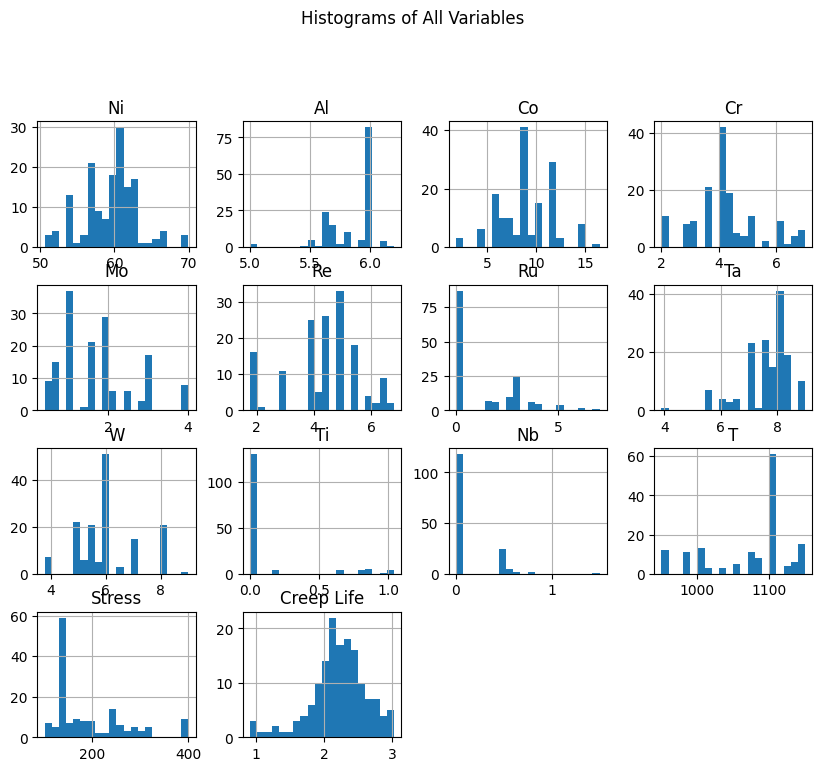

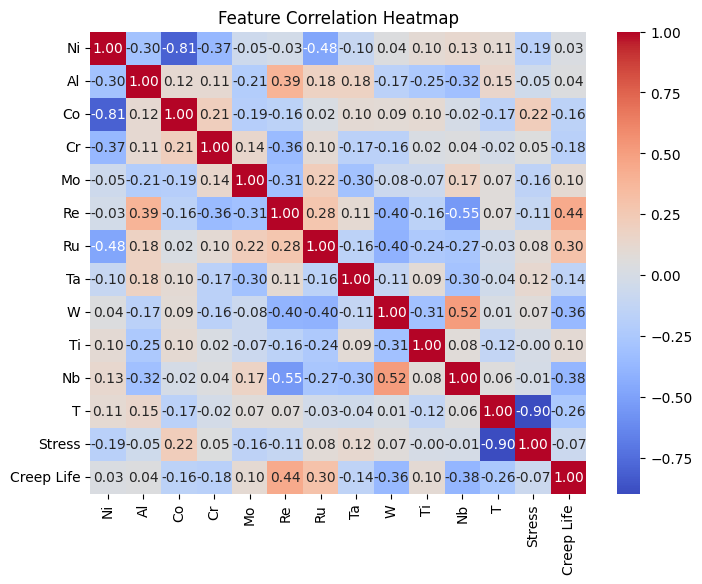

----------------------------------------
Features (X) and Target (y) Defined.
----------------------------------------
--- Final Dataset Shapes ---
Original features shape (X): (152, 13)
Training data inputs (X_train_scaled): (121, 13)
Training labels (y_train): (121,)
Testing data inputs (X_test_scaled): (31, 13)
Testing labels (y_test): (31,)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print("--- Brief Exploratory Data Analysis ---")
print("Missing Values Check:")
print(data_1.isnull().sum())
print("-" * 40)

print("Data Information:")
data_1.info()
print("-" * 40)

print("Descriptive Statistics:")
print(data_1.describe().T)
print("-" * 40)

data_1.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of All Variables', y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
correlation = data_1.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()
print("-" * 40)

X = data_1.drop('Creep Life', axis=1)
y = data_1['Creep Life']

print("Features (X) and Target (y) Defined.")
print("-" * 40)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Final Dataset Shapes ---")
print(f'Original features shape (X): {X.shape}')
print(f'Training data inputs (X_train_scaled): {X_train_scaled.shape}')
print(f'Training labels (y_train): {y_train.shape}')
print(f'Testing data inputs (X_test_scaled): {X_test_scaled.shape}')
print(f'Testing labels (y_test): {y_test.shape}')

### Train ANNs

Create an ANN model with 3 hidden layers called `model_1`. Train the model for 100 epochs and evaluate it on the test dataset. Plot the learning curve.

(1 point)

--- Model Architecture Summary ---


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593 (10.13 KB)

 Trainable params: 2,593 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

----------------------------------------
--- Starting Model Training (100 Epochs) ---
Training Complete.
----------------------------------------
--- Model Evaluation on Test Data ---
Test MSE: 0.1069
Test MAE: 0.2731
----------------------------------------


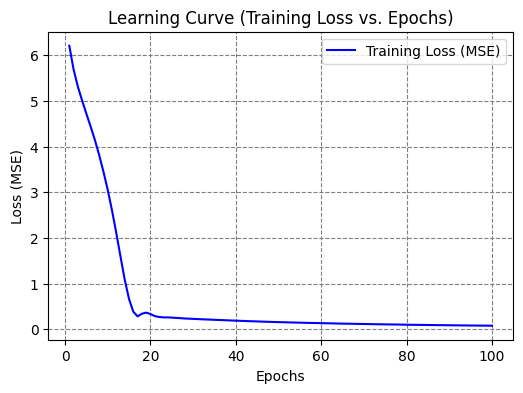

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_features = X_train_scaled.shape[1]

neurons_per_layer = 32

inputs = Input(shape=(input_features,))

dense1 = Dense(neurons_per_layer, activation='relu')(inputs)

dense2 = Dense(neurons_per_layer, activation='relu')(dense1)

dense3 = Dense(neurons_per_layer, activation='relu')(dense2)

outputs = Dense(1)(dense3)

model_1 = Model(inputs, outputs)

print("--- Model Architecture Summary ---")
model_1.summary()
print("-" * 40)

model_1.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mean_absolute_error']
)


print("--- Starting Model Training (100 Epochs) ---")
history = model_1.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    verbose=0
)
print("Training Complete.")
print("-" * 40)

print("--- Model Evaluation on Test Data ---")
evals_test = model_1.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test MSE: {evals_test[0]:.4f}')
print(f'Test MAE: {evals_test[1]:.4f}')
print("-" * 40)

train_loss = history.history['loss']
epochsn = range(1, len(train_loss) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochsn, train_loss, 'b', label='Training Loss (MSE)')
plt.grid(color='gray', linestyle='--')
plt.title('Learning Curve (Training Loss vs. Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

Calculate the MSE, MAE, and R2-score metrics on the test dataset.

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Generating predictions on the test dataset...")
all_preds = model_1.predict(X_test_scaled)

if all_preds.ndim > 1 and all_preds.shape[1] == 1:
    all_preds = all_preds.flatten()

print("Prediction Complete.")
print("-" * 40)

mse = mean_squared_error(y_test, all_preds)
mae = mean_absolute_error(y_test, all_preds)
r2 = r2_score(y_test, all_preds)

print("--- Regression Metrics on Test Dataset ---")
print(f'Mean Squared Error (MSE): {mse:7.4f}')
print(f'Mean Absolute Error (MAE): {mae:7.4f}')
print(f'R2 score (Coefficient of Determination): {r2:7.4f}')
print("-" * 40)

Generating predictions on the test dataset...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction Complete.
----------------------------------------
--- Regression Metrics on Test Dataset ---
Mean Squared Error (MSE):  0.1069
Mean Absolute Error (MAE):  0.2731
R2 score (Coefficient of Determination):  0.0946
----------------------------------------


### Train Random Forest

Train a Random Forest regression model for predicting the creep life of the materials.

Calculate the MSE, MAE, and R2-score metrics on the test dataset.

Which model has better performance: ANN or RF?

(1 point)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("--- Training Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

print("Random Forest Training Complete.")
print("-" * 40)

rf_preds = rf_model.predict(X_test)
print("Random Forest Prediction Complete.")
print("-" * 40)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

if 'mse' not in locals():
    print("WARNING: Re-calculating ANN metrics for comparison...")
    ann_preds = model_1.predict(X_test_scaled).flatten()
    mse = mean_squared_error(y_test, ann_preds)
    mae = mean_absolute_error(y_test, ann_preds)
    r2 = r2_score(y_test, ann_preds)

print("--- Random Forest Metrics (Test Dataset) ---")
print(f'Random Forest MSE: {rf_mse:7.4f}')
print(f'Random Forest MAE: {rf_mae:7.4f}')
print(f'Random Forest R2 score: {rf_r2:7.4f}')
print("-" * 40)

print("--- Model Performance Comparison (R2 Score) ---")

if rf_r2 > r2:
    better_model = "Random Forest (RF)"
    better_r2 = rf_r2
    worse_r2 = r2
else:
    better_model = "Artificial Neural Network (ANN)"
    better_r2 = r2
    worse_r2 = rf_r2

comparison_data = {
    'Metric': ['MSE', 'MAE', 'R2 Score'],
    'ANN Value': [mse, mae, r2],
    'RF Value': [rf_mse, rf_mae, rf_r2]
}
comparison_df = pd.DataFrame(comparison_data)

print(comparison_df.to_markdown(index=False, floatfmt=".4f"))
print("\n")
print(f"Based on the R2-score (higher is better), the **{better_model}** model has better performance.")
print(f"({better_model} R2: {better_r2:.4f} vs. Other R2: {worse_r2:.4f})")

--- Training Random Forest Regressor ---
Random Forest Training Complete.
----------------------------------------
Random Forest Prediction Complete.
----------------------------------------
--- Random Forest Metrics (Test Dataset) ---
Random Forest MSE:  0.0755
Random Forest MAE:  0.2197
Random Forest R2 score:  0.3603
----------------------------------------
--- Model Performance Comparison (R2 Score) ---
| Metric   |   ANN Value |   RF Value |
|:---------|------------:|-----------:|
| MSE      |      0.1069 |     0.0755 |
| MAE      |      0.2731 |     0.2197 |
| R2 Score |      0.0946 |     0.3603 |


Based on the R2-score (higher is better), the **Random Forest (RF)** model has better performance.
(Random Forest (RF) R2: 0.3603 vs. Other R2: 0.0946)


Plot the ground-truth and predicted values for the first 10 data points in the test dataset for the ANN and RF models in a single figure.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


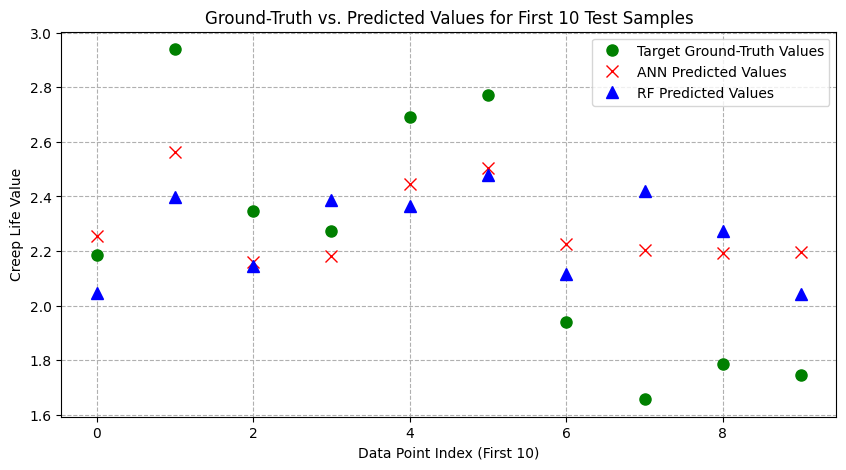

In [11]:
y_test_10 = np.array(y_test[:10])

ann_predictions_10 = model_1.predict(X_test_scaled[:10]).flatten()

rf_predictions_10 = rf_model.predict(X_test[:10])

plt.figure(figsize=(10, 5))

plt.plot(y_test_10, 'go', label='Target Ground-Truth Values', markersize=8)

plt.plot(ann_predictions_10, 'rx', label='ANN Predicted Values', markersize=8)

plt.plot(rf_predictions_10, 'b^', label='RF Predicted Values', markersize=8)

plt.title('Ground-Truth vs. Predicted Values for First 10 Test Samples')
plt.xlabel('Data Point Index (First 10)')
plt.ylabel('Creep Life Value')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

## Problem 2 (2 points)

Import the file `insurance.csv` from the data folder as a pandas DataFrame called `data_2`.

The dataset contains information for insurance charges based on age, sex, BMI, number of children, smoker, and region.

The goal is to predict insurance charges based on the given features.

In [20]:
import os

folder_path = '/content/drive/MyDrive/Assignment_4_October_8/data'
file_name = 'insurance.csv'

file_path = os.path.join(folder_path, file_name)

data_2 = pd.read_csv(file_path)

### Exploratory Data Analysis and Data Preparation

Perform a brief Exploratory Data Analysis. Preprocess the data, split the data into training and testing datasets, and scale them into [0, 1] range. Display the shapes of the variables.

(1 point)

--- Brief Exploratory Data Analysis ---
Missing Values Check:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
----------------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
----------------------------------------
Descriptive Statistics for Numerical Columns:
           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   

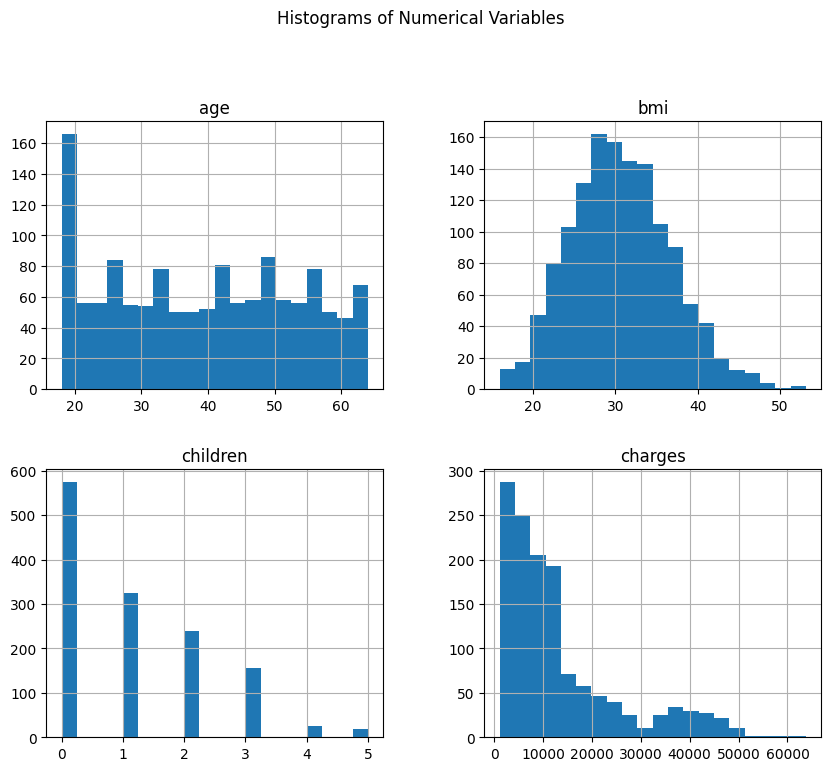

----------------------------------------
Binary categorical features encoded (sex, smoker).
Multi-class categorical feature encoded (region).
----------------------------------------
Features (X) shape after encoding: (1338, 8)
Features (X) and Target (y) Defined.
----------------------------------------
--- Final Dataset Shapes ---
Training data inputs (X_train_scaled): (1070, 8)
Training labels (y_train): (1070,)
Testing data inputs (X_test_scaled): (268, 8)
Testing labels (y_test): (268,)


In [21]:
from sklearn.preprocessing import LabelEncoder

print("--- Brief Exploratory Data Analysis ---")

print("Missing Values Check:")
print(data_2.isnull().sum())
print("-" * 40)

print("Data Information:")
data_2.info()
print("-" * 40)

print("Descriptive Statistics for Numerical Columns:")
print(data_2.describe().T)
print("-" * 40)

numerical_cols = data_2.select_dtypes(include=np.number).columns
data_2[numerical_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.show()
print("-" * 40)

data_preprocessed = data_2.copy()

le = LabelEncoder()
data_preprocessed['sex'] = le.fit_transform(data_preprocessed['sex'])
data_preprocessed['smoker'] = le.fit_transform(data_preprocessed['smoker'])
print("Binary categorical features encoded (sex, smoker).")

data_preprocessed = pd.get_dummies(data_preprocessed, columns=['region'], drop_first=True)
print("Multi-class categorical feature encoded (region).")
print("-" * 40)

X = data_preprocessed.drop('charges', axis=1)
y = data_preprocessed['charges']

print(f"Features (X) shape after encoding: {X.shape}")
print("Features (X) and Target (y) Defined.")
print("-" * 40)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Final Dataset Shapes ---")
print(f'Training data inputs (X_train_scaled): {X_train_scaled.shape}')
print(f'Training labels (y_train): {y_train.shape}')
print(f'Testing data inputs (X_test_scaled): {X_test_scaled.shape}')
print(f'Testing labels (y_test): {y_test.shape}')

### Train ANNs

Create an ANN model with 3 hidden layers called `model_2`. Train the model for 100 epochs and evaluate it on the test dataset. Plot the learning curve.

(1 point)

--- Model Architecture Summary (model_2) ---


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

----------------------------------------
--- Starting Model Training (100 Epochs) ---
Training Complete.
----------------------------------------
--- Model Evaluation on Test Data ---
Test MSE: 33,189,682.00
Test MAE: 4,037.32
----------------------------------------


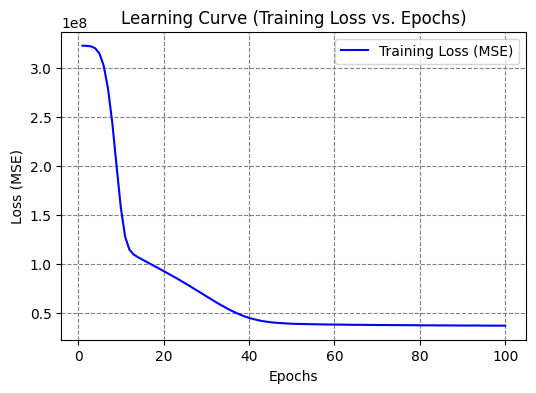

In [24]:
input_features = X_train_scaled.shape[1]

neurons_per_layer = 32

inputs = Input(shape=(input_features,))

dense1 = Dense(neurons_per_layer, activation='relu')(inputs)

dense2 = Dense(neurons_per_layer, activation='relu')(dense1)

dense3 = Dense(neurons_per_layer, activation='relu')(dense2)

outputs = Dense(1)(dense3)

model_2 = Model(inputs, outputs)

print("--- Model Architecture Summary (model_2) ---")
model_2.summary()
print("-" * 40)


model_2.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mean_absolute_error']
)


print("--- Starting Model Training (100 Epochs) ---")
history = model_2.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    verbose=0
)
print("Training Complete.")
print("-" * 40)

print("--- Model Evaluation on Test Data ---")
evals_test = model_2.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test MSE: {evals_test[0]:,.2f}')
print(f'Test MAE: {evals_test[1]:,.2f}')
print("-" * 40)

train_loss = history.history['loss']
epochsn = range(1, len(train_loss) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochsn, train_loss, 'b', label='Training Loss (MSE)')
plt.grid(color='gray', linestyle='--')
plt.title('Learning Curve (Training Loss vs. Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

### Evaluate the Model

Calculate MSE, MAE, and R-square metrics, and plot the ground-truth and predicted values for the first 10 data points in the test dataset.

Generating predictions on the test dataset...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Prediction Complete.
----------------------------------------
--- Regression Metrics on Test Dataset ---
Mean Squared Error (MSE): 33,189,679.76
Mean Absolute Error (MAE): 4,037.32
R2 score (Coefficient of Determination):  0.7862
----------------------------------------


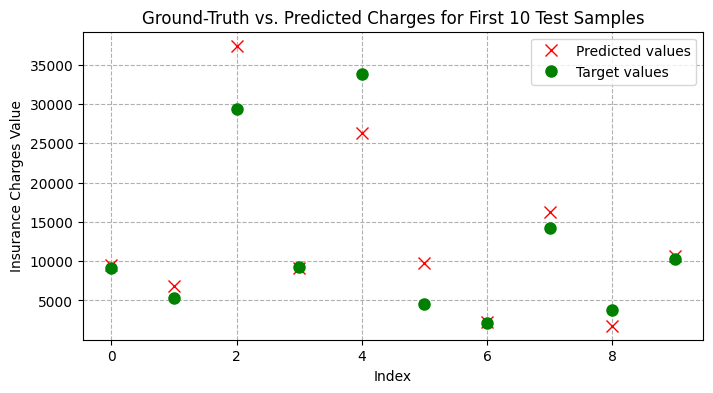

In [26]:
print("Generating predictions on the test dataset...")
all_preds = model_2.predict(X_test_scaled)

if all_preds.ndim > 1 and all_preds.shape[1] == 1:
    all_preds = all_preds.flatten()

print("Prediction Complete.")
print("-" * 40)

mse = mean_squared_error(y_test, all_preds)
mae = mean_absolute_error(y_test, all_preds)
r2 = r2_score(y_test, all_preds)

print("--- Regression Metrics on Test Dataset ---")
print(f'Mean Squared Error (MSE): {mse:,.2f}')
print(f'Mean Absolute Error (MAE): {mae:,.2f}')
print(f'R2 score (Coefficient of Determination): {r2:7.4f}')
print("-" * 40)

predictions_10 = all_preds[:10]
y_test_10 = np.array(y_test[:10])

plt.figure(figsize=(8, 4))
plt.plot(predictions_10, 'rx', label='Predicted values', markersize=8)
plt.plot(y_test_10, 'go', label='Target values', markersize=8)

plt.title('Ground-Truth vs. Predicted Charges for First 10 Test Samples')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Insurance Charges Value')
plt.grid(True, linestyle='--')
plt.show()